In [1]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.44%


In [2]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
X = dataset[:, 0:8]
Y = dataset[:, 8]

# Split into training and testing
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=7)

# Further split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    verbosity=1,
    random_state=42,
    early_stopping_rounds=10,   # ✅ Set here
    eval_metric="logloss"       # ✅ Set here
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# Make predictions
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.63206
[1]	validation_0-logloss:0.61213
[2]	validation_0-logloss:0.59684
[3]	validation_0-logloss:0.58508
[4]	validation_0-logloss:0.57666
[5]	validation_0-logloss:0.57098
[6]	validation_0-logloss:0.56144
[7]	validation_0-logloss:0.55878
[8]	validation_0-logloss:0.55190
[9]	validation_0-logloss:0.55208
[10]	validation_0-logloss:0.54625
[11]	validation_0-logloss:0.54348
[12]	validation_0-logloss:0.54070
[13]	validation_0-logloss:0.53721
[14]	validation_0-logloss:0.53951
[15]	validation_0-logloss:0.53579
[16]	validation_0-logloss:0.54066
[17]	validation_0-logloss:0.53693
[18]	validation_0-logloss:0.53646
[19]	validation_0-logloss:0.53733
[20]	validation_0-logloss:0.53563
[21]	validation_0-logloss:0.53323
[22]	validation_0-logloss:0.53332
[23]	validation_0-logloss:0.53602
[24]	validation_0-logloss:0.53508
[25]	validation_0-logloss:0.53601
[26]	validation_0-logloss:0.53518
[27]	validation_0-logloss:0.53747
[28]	validation_0-logloss:0.53918
[29]	validation_0-loglos

In [4]:
print(model.feature_importances_)

[0.08478499 0.2675748  0.07075439 0.06080931 0.09268497 0.19996065
 0.10000587 0.12342507]


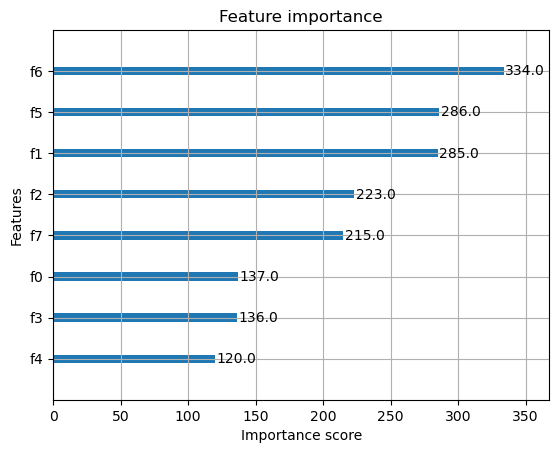

In [6]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [9]:
# Tune learning_rate
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.517018 using {'learning_rate': 0.01}
-0.643877 (0.002168) with: {'learning_rate': 0.0001}
-0.620317 (0.006926) with: {'learning_rate': 0.001}
-0.517018 (0.036275) with: {'learning_rate': 0.01}
-0.557111 (0.115078) with: {'learning_rate': 0.1}
-0.662438 (0.149560) with: {'learning_rate': 0.2}
-0.750694 (0.199802) with: {'learning_rate': 0.3}
